# Autocorrelation Function

We define the autocorrelation function as $$C(t,\tau) = \langle x(t)x(t+\tau) \rangle - \langle x(t)\rangle \langle x(t+\tau)\rangle$$

As seen in class, $$C(t,\tau) = \sigma_t^2 e^{-k_d\tau} = \Lambda(t)e^{-k_d\tau} = \frac{k_b}{k_d}(1-e^{-k_d t})e^{-k_d\tau}$$

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
k_b=10
k_d=1
T_max = 25/k_d

In [5]:
dt = .1
nreps = 1000

X = np.zeros([nreps,int(T_max/dt)])
autocor = np.zeros([int(T_max/dt)])
x0 = np.zeros([nreps])
#x0 = np.random.poisson(k_b/k_d,size=nreps)

for i in range(nreps):
    x=x0[i]
    t=0
    j=0
    mu_steady = []

    while t<T_max:
        r=np.random.rand(2)
        k0 = k_b+k_d*x
            
        t_react = -np.log(r[0])/k0
        t = t+t_react
        
        while j<np.min([int(t/dt),int(T_max/dt)]):
            X[i][j]=x
            j=j+1
        
        if r[1]>k_b/k0:
            x = x-1
        else:
            x=x+1

$X^2$ is a matrix such that $X^2_{t,t+\tau} = \langle x(t)x(t+\tau) \rangle$

$X^{avg}$ on the other hand is simply given by $X^{avg}_t = \langle x(t) \rangle$

In [6]:
X2=np.dot(np.transpose(X),X)/X.shape[0]

In [7]:
Xavg = np.dot(np.ones([X.shape[0]]),X)/X.shape[0]

I've generated the autocorrelation from time $t=0$ to $t=15/k_d$.

$\tau$ lies in between $0$ and $t$

I didn't want to increase $t$ any higher since $t+\tau\leq T_{max} = \frac{25}{k_d}$

In [8]:
def autocor_store(t,tau):
    if t+tau>=X.shape[1]:
        return(0)
    cov = X2[t,t+tau]-Xavg[t]*Xavg[t+tau]
    sigma_t = np.sqrt(X2[t,t]-(Xavg[t])**2)
    sigma_tau = np.sqrt(X2[t+tau,t+tau]-(Xavg[t+tau])**2)
    if (sigma_t==0 or sigma_tau==0):
        return(0)
    return(cov)

In [13]:
autocorr = np.zeros([int(15/(k_d*dt)),int(T_max/dt)])

In [16]:
autocorr = []
for tau in range(int((T_max-20)/dt)):
    autocorr.append(autocor_store(int(15/(k_d*dt)),tau))

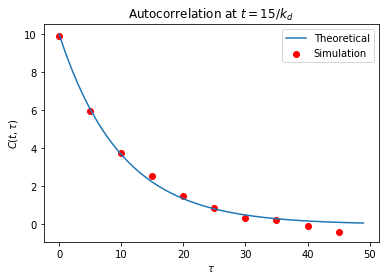

In [20]:
plt.scatter(np.arange(0,len(autocorr[::5]))*5,autocorr[::5],label="Simulation",color='r')
plt.plot([10*np.exp(-k_d*dt*t) for t in range(50)],label="Theoretical")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$C(t,\tau)$")
plt.title("Autocorrelation at $t=15/k_d$")
plt.legend()